In [1]:
# Importing necessary libraries
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Now load the encoded dataset.
df = pd.read_csv('encoded_retractions35215_V10.csv')
df.head()

,Journal,ArticleType,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness,Subject,Institution,Publisher,Country,Author,Cluster
0,4884,56,5,1.0,0.900000,315.000000,280,0,304,0,3.0,0.194505,0.125899,0.028624,0.001657,0.000010,1
1,3474,56,2,3.0,0.290000,23.000000,1089,0,1115,0,3.0,0.156626,0.062955,0.099475,0.011070,0.000009,1
2,3474,56,14,3.0,0.290000,23.000000,1344,0,1367,0,3.0,0.156626,0.062955,0.099475,0.011070,0.000008,1
3,5106,10,0,5.0,1.458473,157.555562,0,0,492,0,1.0,0.232383,0.050368,0.099475,0.064331,0.000009,1
4,964,56,2,1.0,0.764000,48.000000,351,1,520,0,0.0,0.166709,0.035978,0.116854,0.024918,0.000009,4


### Split the original dataset into 4 smaller datasets basing on clusters.

In [3]:
df1 = df.loc[df['Cluster'] == 1]
df1 = df1.drop(['Cluster'], axis=1)
df1.head()

,Journal,ArticleType,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness,Subject,Institution,Publisher,Country,Author
0,4884,56,5,1.0,0.900000,315.000000,280,0,304,0,3.0,0.194505,0.125899,0.028624,0.001657,0.000010
1,3474,56,2,3.0,0.290000,23.000000,1089,0,1115,0,3.0,0.156626,0.062955,0.099475,0.011070,0.000009
2,3474,56,14,3.0,0.290000,23.000000,1344,0,1367,0,3.0,0.156626,0.062955,0.099475,0.011070,0.000008
3,5106,10,0,5.0,1.458473,157.555562,0,0,492,0,1.0,0.232383,0.050368,0.099475,0.064331,0.000009
6,4532,56,1,5.0,1.458473,157.555562,113,0,184,0,3.0,0.256035,0.041973,0.099475,0.064331,0.000018


In [4]:
df2 = df.loc[df['Cluster'] == 2]
df2 = df2.drop(['Cluster'], axis=1)
df2.head()

,Journal,ArticleType,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness,Subject,Institution,Publisher,Country,Author
815,1888,56,5,5.0,1.458473,157.555562,3594,0,3657,0,0.0,0.228665,0.083936,0.030356,0.011070,0.000007
1183,769,56,33,1.0,1.518000,177.000000,3089,1,3169,0,3.0,0.256035,0.050366,0.012807,0.015392,0.000007
1208,1980,56,27,5.0,1.458473,157.555562,3559,0,3660,0,0.0,0.256035,0.062955,0.012637,0.493324,0.000028
1708,1048,56,30,5.0,1.458473,157.555562,3607,1,3698,0,3.0,0.256035,0.050366,0.012807,0.000925,0.000007
1747,974,56,36,2.0,0.518000,134.000000,3688,1,3780,0,1.0,0.256035,0.035978,0.000057,0.248367,0.000016


In [5]:
df3 = df.loc[df['Cluster'] == 3]
df3 = df3.drop(['Cluster'], axis=1)
df3.head()

,Journal,ArticleType,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness,Subject,Institution,Publisher,Country,Author
131,741,20,13,2.0,0.782,84.0,7730,0,7770,0,1.0,0.201296,0.125899,0.099475,0.025406,0.000007
229,4147,56,863,1.0,18.509,1391.0,5415,0,5460,0,3.0,0.256035,0.083936,0.099475,0.099414,0.000012
313,4090,56,13,1.0,0.901,135.0,7434,0,7489,0,3.0,0.256035,0.083936,0.099475,0.002185,0.000009
344,3752,20,44,1.0,1.042,154.0,8669,0,8692,0,0.0,0.228665,0.083986,0.114128,0.029080,0.000208
419,4494,56,69,1.0,1.345,497.0,10081,1,10153,0,1.0,0.156626,0.083936,0.000795,0.012895,0.000007


In [6]:
df4 = df.loc[df['Cluster'] == 4]
df4 = df4.drop(['Cluster'], axis=1)
df4.head()

,Journal,ArticleType,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness,Subject,Institution,Publisher,Country,Author
4,964,56,2,1.0,0.764,48.0,351,1,520,0,0.0,0.166709,0.035978,0.116854,0.024918,0.000009
5,964,56,2,1.0,0.764,48.0,625,0,794,0,0.0,0.228665,0.050366,0.116854,0.493324,0.000048
7,1446,56,2,1.0,0.445,79.0,866,0,1028,0,0.0,0.201296,0.125899,0.116854,0.493324,0.000007
8,1446,56,3,1.0,0.445,79.0,935,0,1097,0,0.0,0.232383,0.125899,0.116854,0.493324,0.000065
9,1446,56,13,1.0,0.445,79.0,1166,0,1328,0,0.0,0.244209,0.083936,0.116854,0.493324,0.000009


#### SMOTE balancing for df1

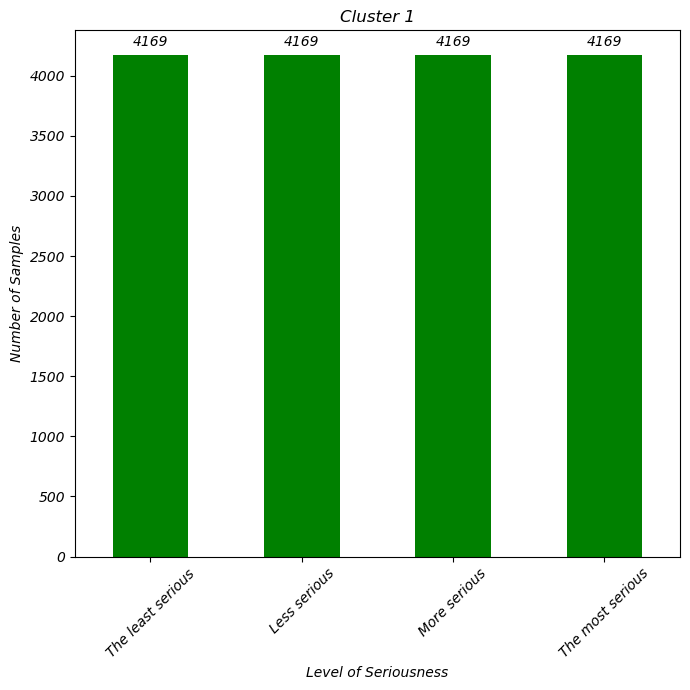

In [7]:
# Separate feataures and the target variable
X1 = df1.drop('LevelOfSeriousness', axis=1)
y1 = df1['LevelOfSeriousness']

# Apply SMOTE
smote = SMOTE(random_state=0)
X_resampled1, y_resampled1 = smote.fit_resample(X1, y1)

# Convert y_resampled to a DataFrame and count the occurrences of each class
y_resampled_df1 = pd.DataFrame(y_resampled1, columns=['LevelOfSeriousness'])
label_counts_resampled1 = y_resampled_df1['LevelOfSeriousness'].value_counts().sort_index()

# Plot the balanced data
plt.figure(figsize=(7, 7))
ax = label_counts_resampled1.plot(kind='bar', color='green')  # 'ax' captures the plot axes
plt.title('Cluster 1')
plt.xlabel('Level of Seriousness')
plt.ylabel('Number of Samples')

# Set custom x-tick labels
plt.xticks(ticks=range(4), labels=['The least serious', 'Less serious', 'More serious', 'The most serious'], rotation=45)

# Annotate each bar with its height value
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

#### SMOTE balancing for df2

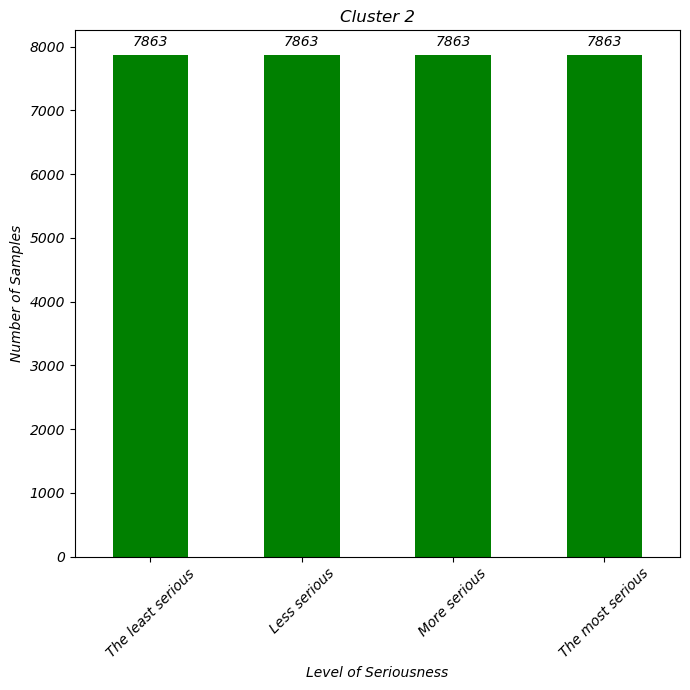

In [8]:
# Separate feataures and the target variable
X2 = df2.drop('LevelOfSeriousness', axis=1)
y2 = df2['LevelOfSeriousness']

# Apply SMOTE
smote = SMOTE(random_state=0)
X_resampled2, y_resampled2 = smote.fit_resample(X2, y2)

# Convert y_resampled to a DataFrame and count the occurrences of each class
y_resampled_df2 = pd.DataFrame(y_resampled2, columns=['LevelOfSeriousness'])
label_counts_resampled2 = y_resampled_df2['LevelOfSeriousness'].value_counts().sort_index()

# Plot the balanced data
plt.figure(figsize=(7, 7))
ax = label_counts_resampled2.plot(kind='bar', color='green')  # 'ax' captures the plot axes
plt.title('Cluster 2')
plt.xlabel('Level of Seriousness')
plt.ylabel('Number of Samples')

# Set custom x-tick labels
plt.xticks(ticks=range(4), labels=['The least serious', 'Less serious', 'More serious', 'The most serious'], rotation=45)

# Annotate each bar with its height value
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

#### SMOTE balancing for df3

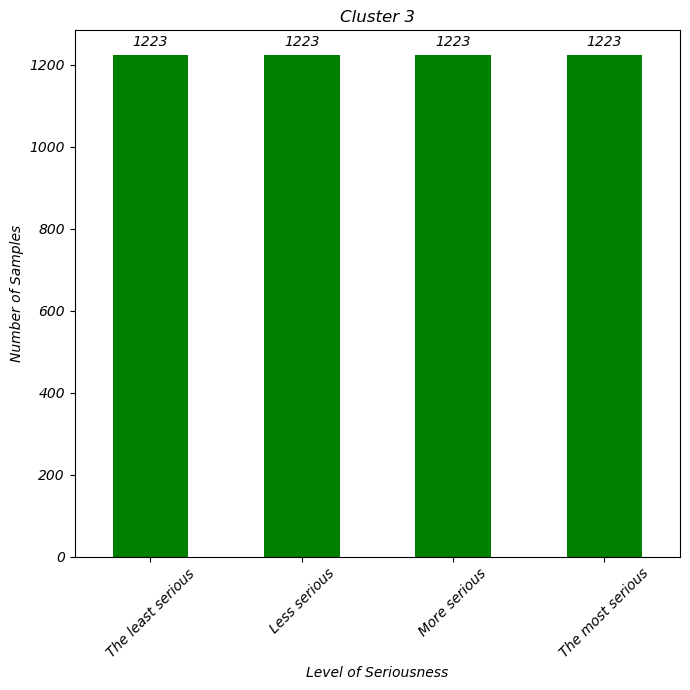

In [9]:
# Separate feataures and the target variable
X3 = df3.drop('LevelOfSeriousness', axis=1)
y3 = df3['LevelOfSeriousness']

# Apply SMOTE
smote = SMOTE(random_state=0)
X_resampled3, y_resampled3 = smote.fit_resample(X3, y3)

# Convert y_resampled to a DataFrame and count the occurrences of each class
y_resampled_df3 = pd.DataFrame(y_resampled3, columns=['LevelOfSeriousness'])
label_counts_resampled3 = y_resampled_df3['LevelOfSeriousness'].value_counts().sort_index()

# Plot the balanced data
plt.figure(figsize=(7, 7))
ax = label_counts_resampled3.plot(kind='bar', color='green')  # 'ax' captures the plot axes
plt.title('Cluster 3')
plt.xlabel('Level of Seriousness')
plt.ylabel('Number of Samples')

# Set custom x-tick labels
plt.xticks(ticks=range(4), labels=['The least serious', 'Less serious', 'More serious', 'The most serious'], rotation=45)

# Annotate each bar with its height value
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

### SMOTE balancing df4

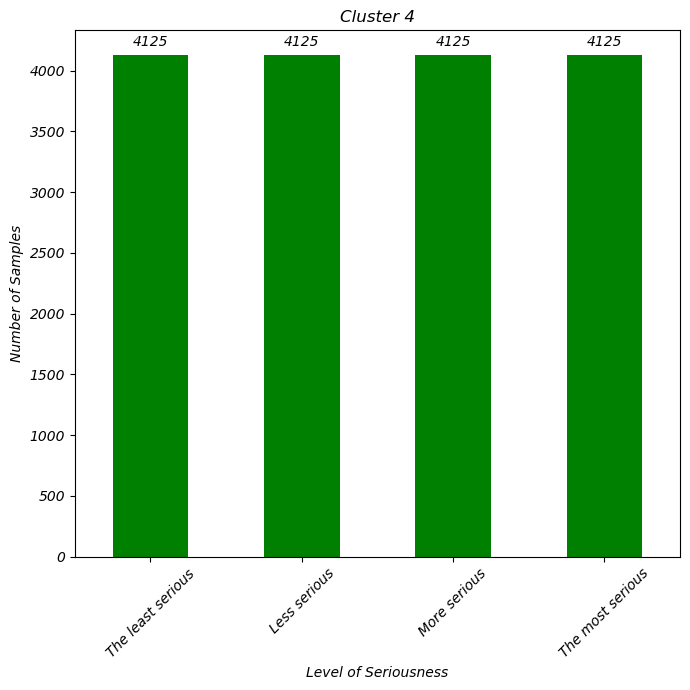

In [10]:
# Separate feataures and the target variable
X4 = df4.drop('LevelOfSeriousness', axis=1)
y4 = df4['LevelOfSeriousness']

# Apply SMOTE
smote = SMOTE(random_state=0)
X_resampled4, y_resampled4 = smote.fit_resample(X4, y4)

# Convert y_resampled to a DataFrame and count the occurrences of each class
y_resampled_df4 = pd.DataFrame(y_resampled4, columns=['LevelOfSeriousness'])
label_counts_resampled4 = y_resampled_df4['LevelOfSeriousness'].value_counts().sort_index()

# Plot the balanced data
plt.figure(figsize=(7, 7))
ax = label_counts_resampled4.plot(kind='bar', color='green')  # 'ax' captures the plot axes
plt.title('Cluster 4')
plt.xlabel('Level of Seriousness')
plt.ylabel('Number of Samples')

# Set custom x-tick labels
plt.xticks(ticks=range(4), labels=['The least serious', 'Less serious', 'More serious', 'The most serious'], rotation=45)

# Annotate each bar with its height value
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

#### Run Classification model (Random Forest) on each cluster

In [11]:
# Function to run Random Forests model
def RF_full_features(X, y):
    # For Random Forest, preprocessing like standardization is not necessary, but let's keep the dataset split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Initialize the Random Forest classifier
    rfc = RandomForestClassifier(random_state=0)
    
    # Applying 5-fold cross-validation
    cv_results = cross_validate(rfc, X_train, y_train, cv=5,
                                scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))
    
    # Training the model on the full training data
    rfc.fit(X_train, y_train)
    
    # Predicting on the test set
    y_pred = rfc.predict(X_test)
    
    # Evaluation metrics
    accuracy_RF = accuracy_score(y_test, y_pred)
    precision_RF = precision_score(y_test, y_pred, average='macro')
    recall_RF = recall_score(y_test, y_pred, average='macro')
    f1_RF = f1_score(y_test, y_pred, average='macro')
    
    print("Accuracy:", accuracy_RF)
    print("Precision:", precision_RF)
    print("Recall:", recall_RF)
    print("F1-Score:", f1_RF)

    return rfc, accuracy_RF, precision_RF, recall_RF, f1_RF

##### Classification on df1

In [12]:
# RF with all features
rfc1, accuracy_RF1, precision_RF1, recall_RF1, f1_RF1 = RF_full_features(X_resampled1, y_resampled1)

Accuracy: 0.7398081534772182
Precision: 0.7422076907598182
Recall: 0.739700130011798
F1-Score: 0.7400509117564151


##### Classification on df2

In [13]:
# RF with all features
rfc2, accuracy_RF2, precision_RF2, recall_RF2, f1_RF2 = RF_full_features(X_resampled2, y_resampled2)

Accuracy: 0.9472261961532348
Precision: 0.948184246177526
Recall: 0.9471608985561506
F1-Score: 0.9473724905032334


##### Classification on df3

In [14]:
# RF with all features
rfc3, accuracy_RF3, precision_RF3, recall_RF3, f1_RF3 = RF_full_features(X_resampled3, y_resampled3)

Accuracy: 0.7303370786516854
Precision: 0.732902945176934
Recall: 0.7306922093169561
F1-Score: 0.7313023099853108


### Classification on df4

In [15]:
# RF with all features
rfc4, accuracy_RF4, precision_RF4, recall_RF4, f1_RF4 = RF_full_features(X_resampled4, y_resampled4)

Accuracy: 0.8124242424242424
Precision: 0.8145850398824717
Recall: 0.8125036798825774
F1-Score: 0.812334951874013


#### Comparison of 3 clusters

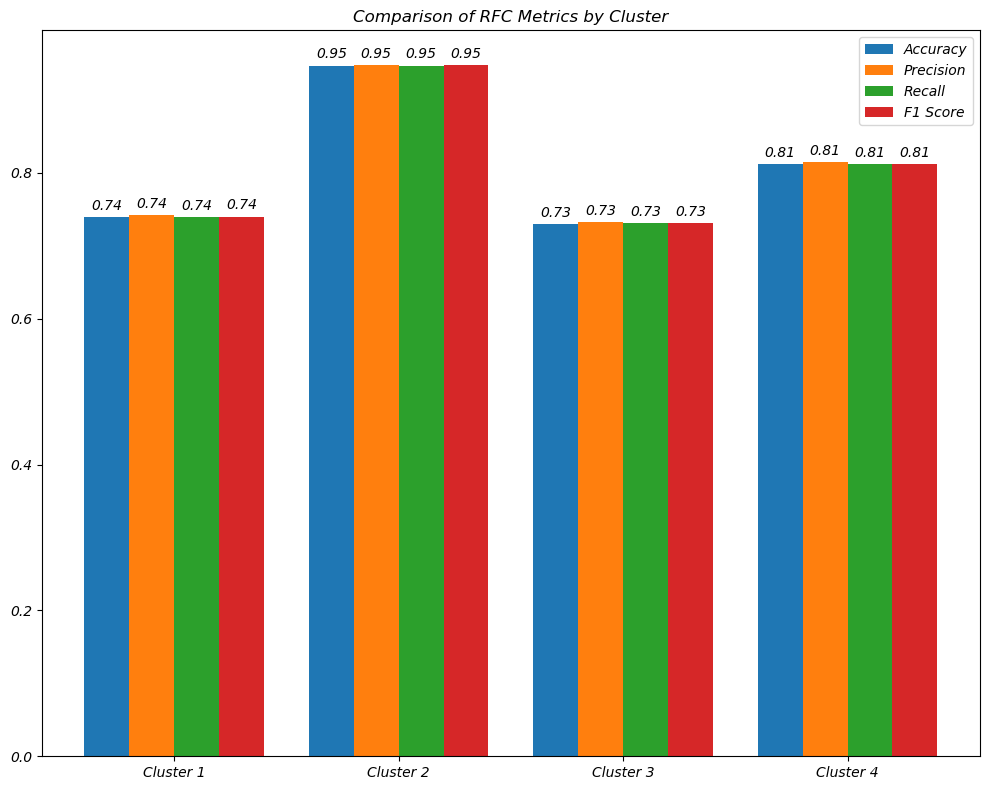

In [16]:
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4']
accuracy = [accuracy_RF1, accuracy_RF2, accuracy_RF3,accuracy_RF4]
precision = [precision_RF1, precision_RF2, precision_RF3,precision_RF4]
recall = [recall_RF1, recall_RF2, recall_RF3,recall_RF4]
f1_scores = [f1_RF1, f1_RF2, f1_RF3,f1_RF4]

x = np.arange(len(clusters))  # the label locations
width = 0.2  # the width of the bars

# Increase the figure size here
fig, ax = plt.subplots(figsize=(10, 8))  # Width, Height in inches
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Comparison of RFC Metrics by Cluster')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()

# Function to add labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

It can be seen from the chart above that the model performs very well on Cluster 2. On the other hand, the model needs improvement when working on Cluster 1 and Cluster 3.

#### Confusion Matrix

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def Confusion_Matrix(rfc, X_resampled, y_resampled, title='Cluster'):
    y_pred = rfc.predict(X_resampled)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_resampled, y_pred)
    
    # Define custom display labels
    display_labels = ['The least serious', 'Less serious', 'More serious', 'The most serious']
    
    # Increase the size of the plot
    plt.figure(figsize=(10, 8))
    
    # Display the confusion matrix with custom labels
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
    plt.title(f'Confusion Matrix for Random Forest Classifier ({title})')
    plt.show()

##### Cluster 1

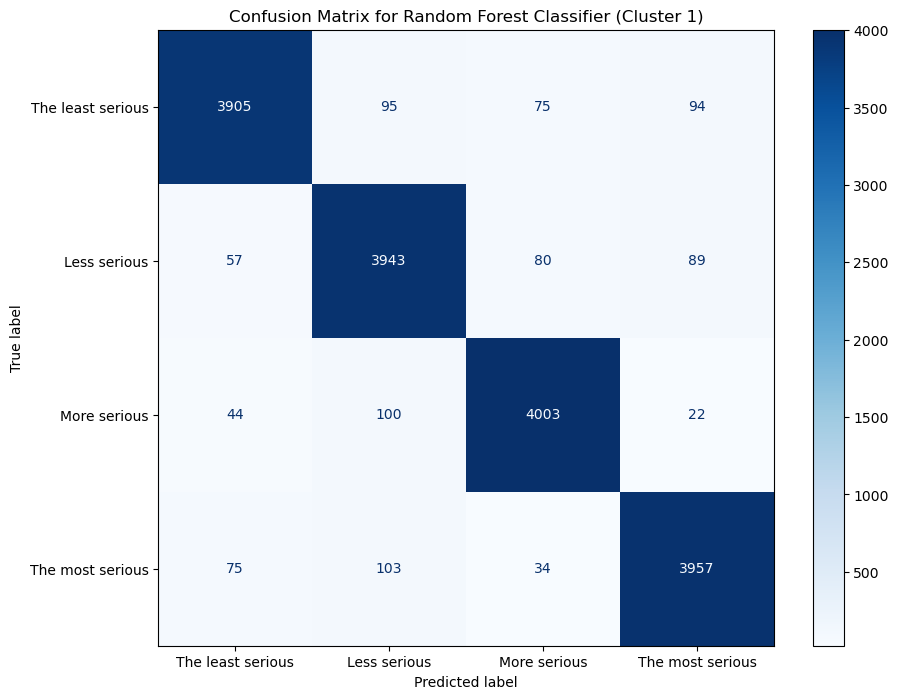

In [38]:
Confusion_Matrix(rfc1, X_resampled1, y_resampled1, 'Cluster 1')

##### Cluster 2

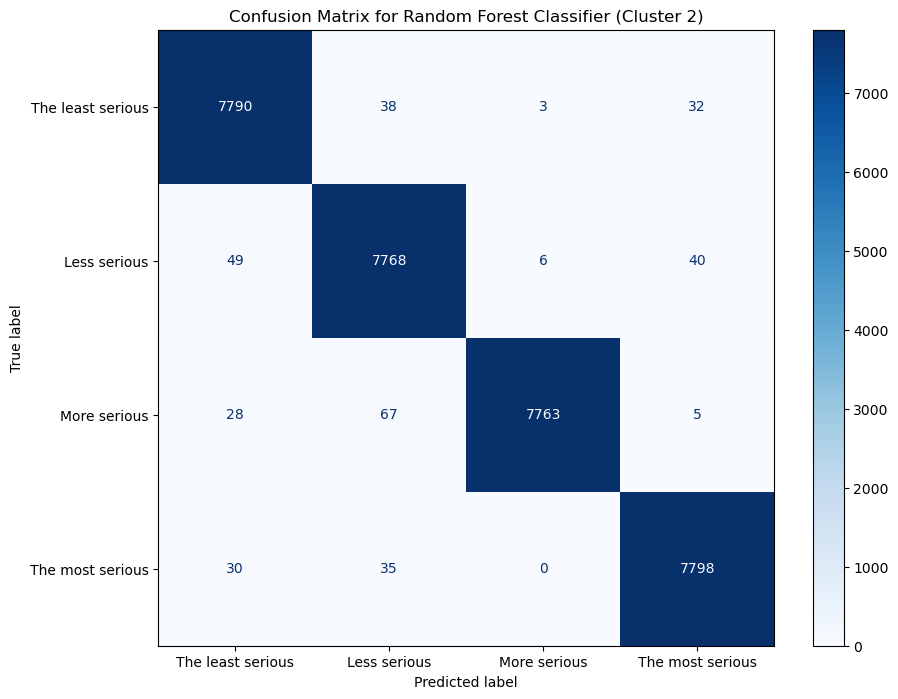

In [39]:
Confusion_Matrix(rfc2, X_resampled2, y_resampled2, 'Cluster 2')

##### Cluster 3

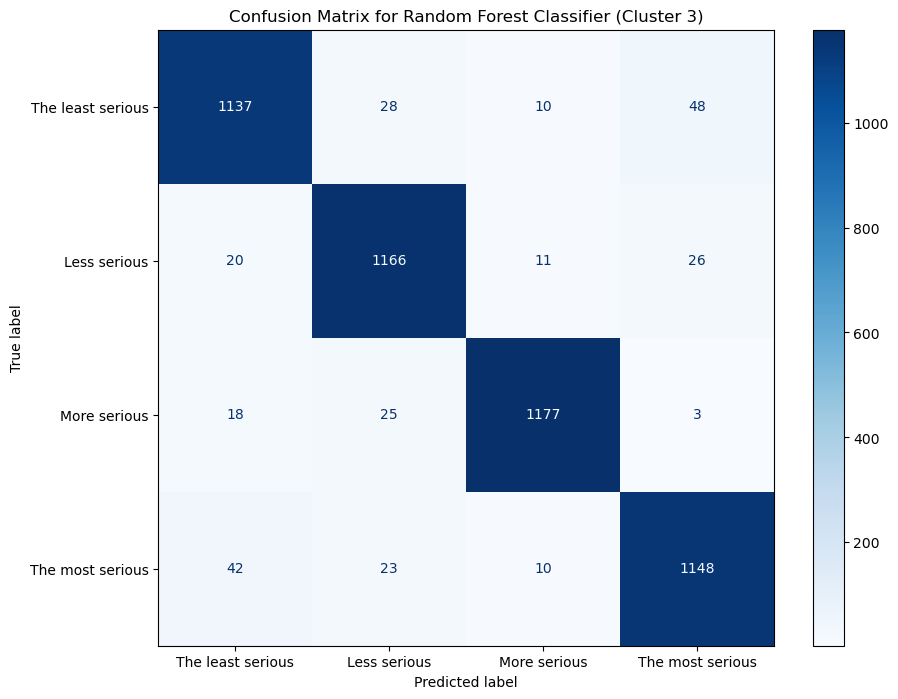

In [40]:
Confusion_Matrix(rfc3, X_resampled3, y_resampled3, 'Cluster 3')

### Cluster 4

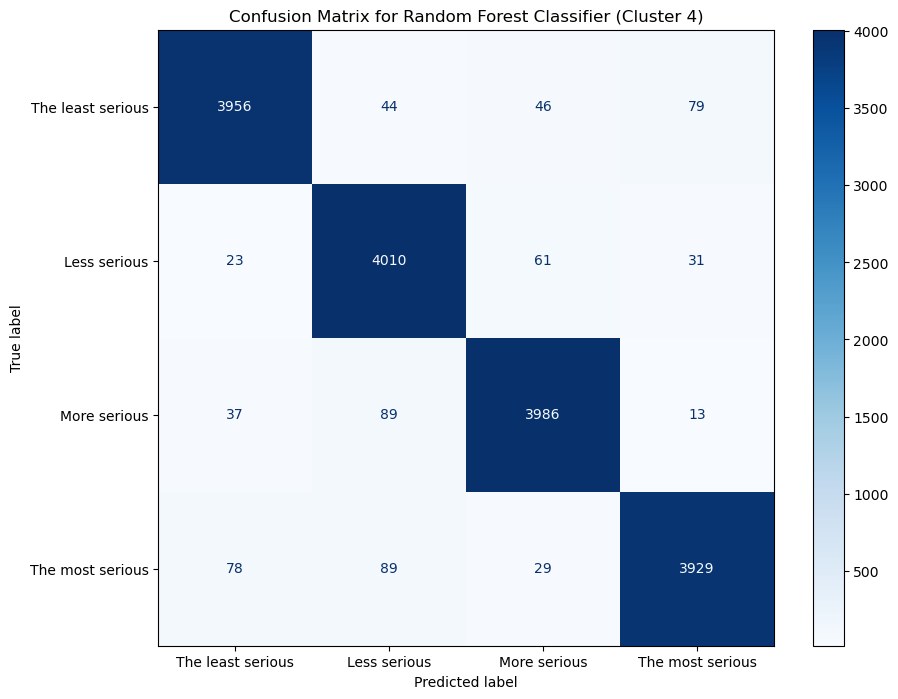

In [41]:
Confusion_Matrix(rfc4, X_resampled4, y_resampled4, 'Cluster 4')

#### Feature Importance


In [42]:
def feature_importance(rfc, X, title):
    # Get feature importance
    feature_importances = rfc.feature_importances_
    
    # Get feature names
    feature_names = X.columns.tolist() 
    
    # Sort the features by importance
    sorted_idx = np.argsort(feature_importances)[::-1]
    sorted_feature_importances = feature_importances[sorted_idx]
    sorted_feature_names = [feature_names[index] for index in sorted_idx]
    
    # Generate a color palette with enough colors
    colors = sns.color_palette("hsv", len(sorted_feature_names))
    
    # Plotting
    plt.figure(figsize=(10, 8))
    bars = plt.barh(range(len(sorted_feature_names)), sorted_feature_importances, color=colors, align='center')
    
    # Add labels to the bars
    for bar, value in zip(bars, sorted_feature_importances):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                 '{:.2f}'.format(value),  # Format the value to 2 decimal places
                 va='center', ha='left')
    
    plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance Ranked by Random Forest ({title})')
    plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature at the top
    
    plt.show()

##### Cluster 1

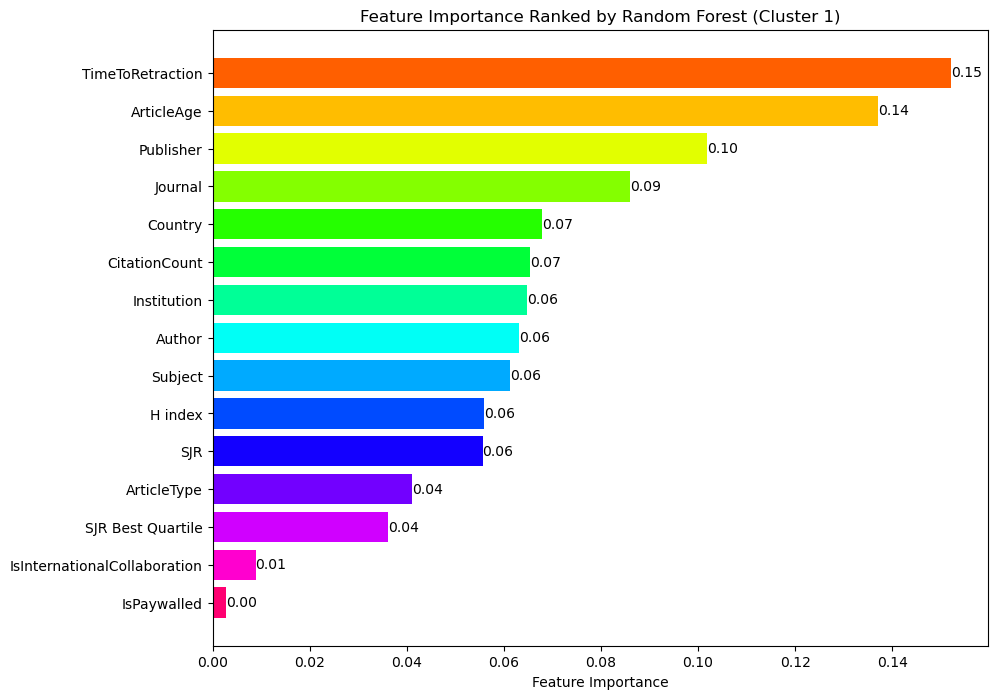

In [43]:
feature_importance(rfc1, X_resampled1, 'Cluster 1')

##### Cluster 2

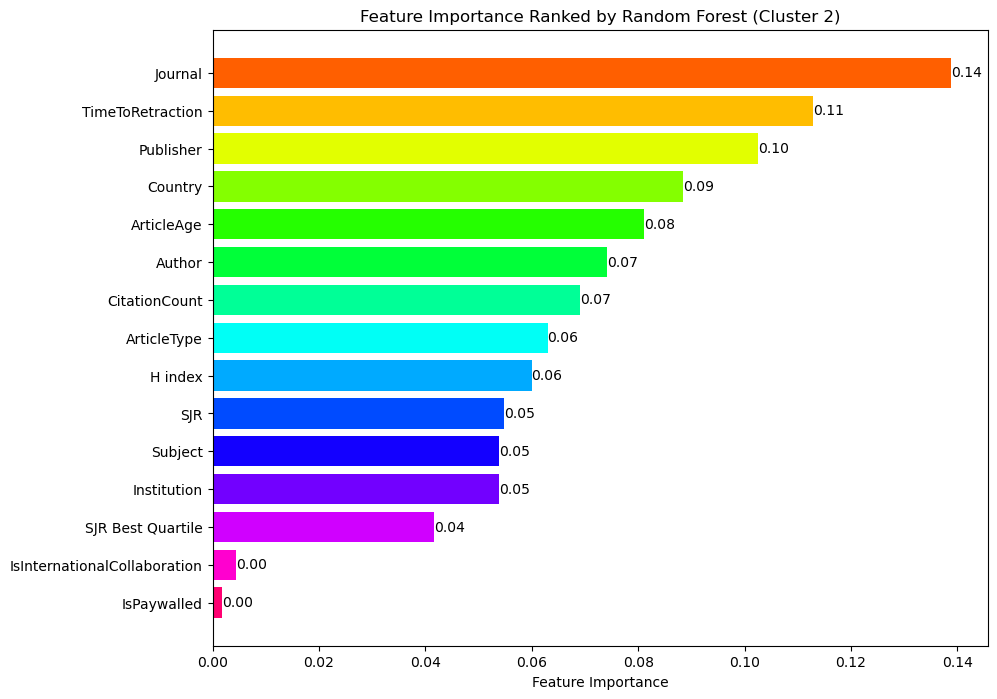

In [44]:
feature_importance(rfc2, X_resampled2, 'Cluster 2')

##### Cluster 3

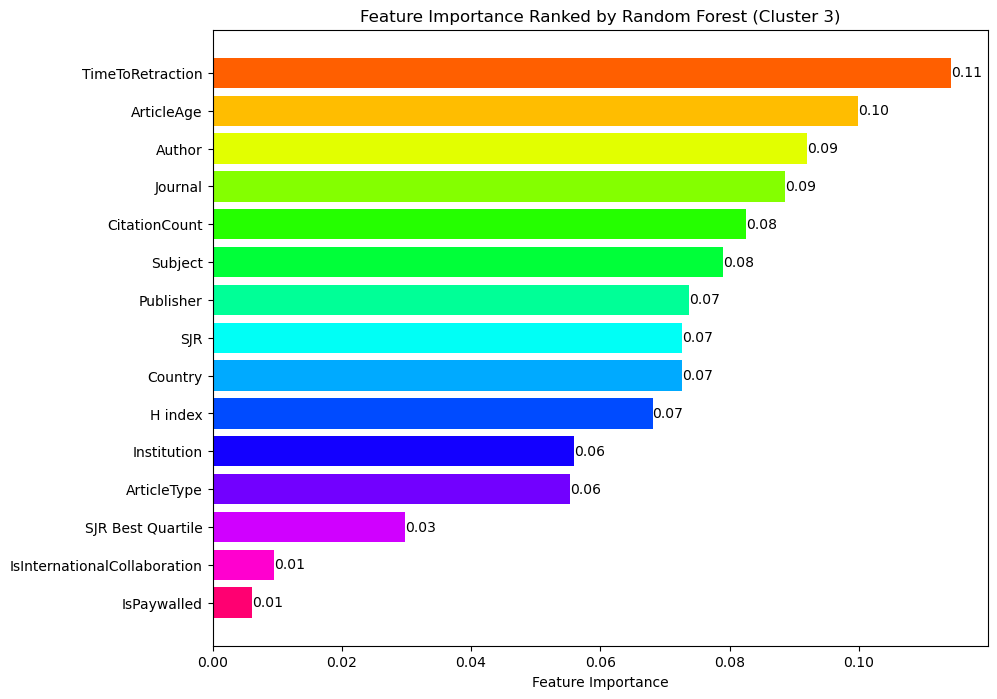

In [45]:
feature_importance(rfc3, X_resampled3, 'Cluster 3')

##### Cluster 4

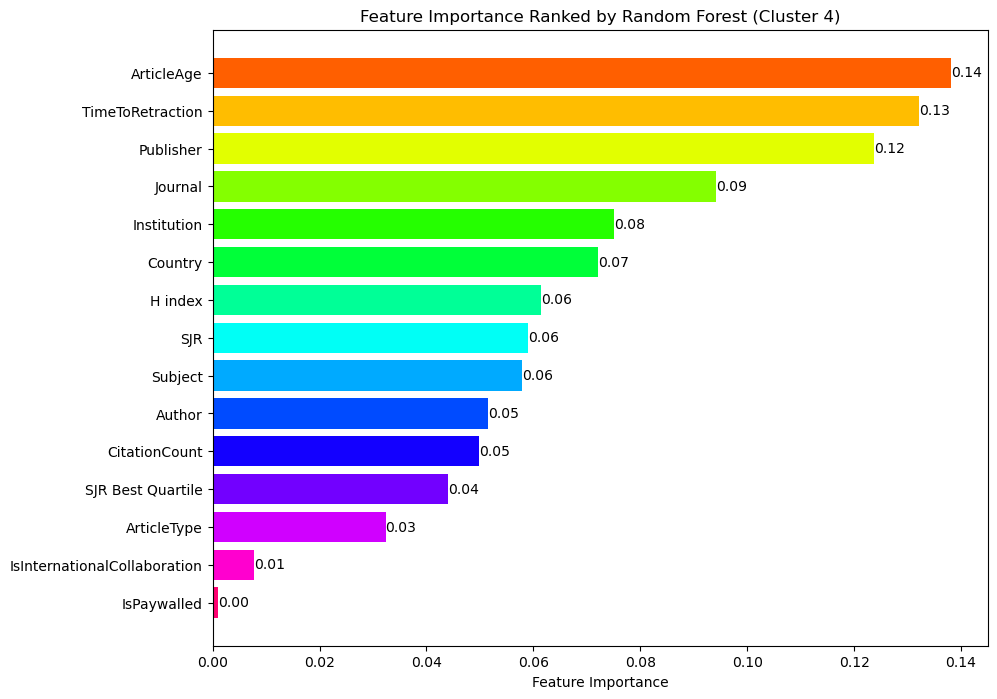

In [46]:
feature_importance(rfc4, X_resampled4, 'Cluster 4')

#### Model optimisation: Hyper-parameter tuning

##### Cluster 3

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.metrics import classification_report
from time import time
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_resampled3, y_resampled3, test_size=0.2, random_state=0)
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rfc3,
    param_distributions=param_grid,
    n_iter=200,  # Number of parameter settings that are sampled
    cv=5,  # Number of folds for cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=0,
    verbose=2
)

# Fit the random search model
start_time = time()
random_search.fit(X_train3, y_train3)
end_time = time()

# Get the best estimator
best_rfc3 = random_search.best_estimator_

# Predict using the best estimator
y_pred_optimized3 = best_rfc3.predict(X_test3)

# Generate the classification report
report3 = classification_report(y_test3, y_pred_optimized3)

# Print the classification report and best parameters
print(report3)
print(f"Best parameters: {random_search.best_params_} with score: {random_search.best_score_:.4f}")
print(f"Time taken for RandomizedSearchCV: {end_time - start_time:.2f} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70       254
         1.0       0.75      0.77      0.76       247
         2.0       0.87      0.83      0.85       242
         3.0       0.67      0.70      0.68       236

    accuracy                           0.75       979
   macro avg       0.75      0.75      0.75       979
weighted avg       0.75      0.75      0.75       979

Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None} with score: 0.7306
Time taken for RandomizedSearchCV: 519.12 seconds


Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None} with score: 0.7306 (previous accuracy = 0.7303)

#### Cluster 1

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.metrics import classification_report
from time import time
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled1, y_resampled1, test_size=0.2, random_state=0)
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rfc1,
    param_distributions=param_grid,
    n_iter=200,  # Number of parameter settings that are sampled
    cv=5,  # Number of folds for cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=0,
    verbose=2
)

# Fit the random search model
start_time = time()
random_search.fit(X_train1, y_train1)
end_time = time()

# Get the best estimator
best_rfc1 = random_search.best_estimator_

# Predict using the best estimator
y_pred_optimized1 = best_rfc1.predict(X_test1)

# Generate the classification report
report1 = classification_report(y_test1, y_pred_optimized1)

# Print the classification report and best parameters
print(report1)
print(f"Best parameters: {random_search.best_params_} with score: {random_search.best_score_:.4f}")
print(f"Time taken for RandomizedSearchCV: {end_time - start_time:.2f} seconds")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
              precision    recall  f1-score   support

         0.0       0.77      0.68      0.72       815
         1.0       0.70      0.76      0.73       876
         2.0       0.78      0.80      0.79       818
         3.0       0.75      0.75      0.75       827

    accuracy                           0.75      3336
   macro avg       0.75      0.75      0.75      3336
weighted avg       0.75      0.75      0.75      3336

Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40} with score: 0.7419
Time taken for RandomizedSearchCV: 3646.18 seconds


Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40} with score: 0.7419 (previous accuracy 0.7398)

### Cluster 4

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.metrics import classification_report
from time import time
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_resampled4, y_resampled4, test_size=0.2, random_state=0)
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rfc4,
    param_distributions=param_grid,
    n_iter=200,  # Number of parameter settings that are sampled
    cv=5,  # Number of folds for cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=0,
    verbose=2
)

# Fit the random search model
start_time = time()
random_search.fit(X_train4, y_train4)
end_time = time()

# Get the best estimator
best_rfc4 = random_search.best_estimator_

# Predict using the best estimator
y_pred_optimized4 = best_rfc4.predict(X_test4)

# Generate the classification report
report4 = classification_report(y_test4, y_pred_optimized4)

# Print the classification report and best parameters
print(report4)
print(f"Best parameters: {random_search.best_params_} with score: {random_search.best_score_:.4f}")
print(f"Time taken for RandomizedSearchCV: {end_time - start_time:.2f} seconds")

Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40} with score: 0.8114 (previous accuracy 0.8124)

#### Cluster 2

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.metrics import classification_report
from time import time
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled2, y_resampled2, test_size=0.2, random_state=0)
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rfc2,
    param_distributions=param_grid,
    n_iter=200,  # Number of parameter settings that are sampled
    cv=5,  # Number of folds for cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=0,
    verbose=2
)

# Fit the random search model
start_time = time()
random_search.fit(X_train4, y_train4)
end_time = time()

# Get the best estimator
best_rfc2 = random_search.best_estimator_

# Predict using the best estimator
y_pred_optimized2 = best_rfc2.predict(X_test2)

# Generate the classification report
report2 = classification_report(y_test2, y_pred_optimized2)

# Print the classification report and best parameters
print(report2)
print(f"Best parameters: {random_search.best_params_} with score: {random_search.best_score_:.4f}")
print(f"Time taken for RandomizedSearchCV: {end_time - start_time:.2f} seconds")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


              precision    recall  f1-score   support

         0.0       0.34      0.07      0.12      1571
         1.0       0.25      0.67      0.36      1559
         2.0       0.08      0.05      0.06      1567
         3.0       0.52      0.27      0.35      1594

    accuracy                           0.26      6291
   macro avg       0.30      0.26      0.22      6291
weighted avg       0.30      0.26      0.22      6291

Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40} with score: 0.8114
Time taken for RandomizedSearchCV: 3523.78 seconds


Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40} with score: 0.8114 (decreased after optimization)